## Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/mushroom.csv')

# EDA

In [ ]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

## Visualizations

(array([178., 218., 216., 215., 207., 198., 185., 211., 203., 169.]),
 array([ 2.        ,  3.30950659,  4.61901318,  5.92851977,  7.23802636,
         8.54753295,  9.85703954, 11.16654612, 12.47605271, 13.7855593 ,
        15.09506589]),
 <BarContainer object of 10 artists>)

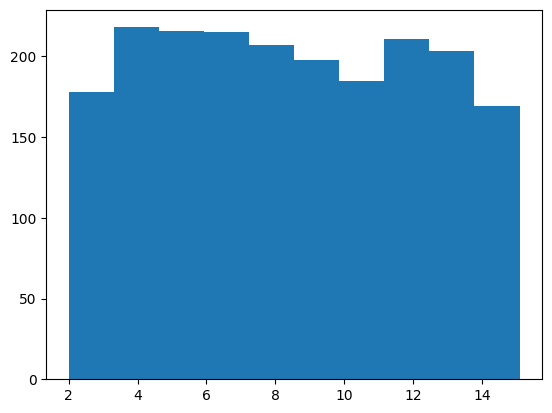

In [ ]:
plt.hist(data["stalk_height"])

### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x791b3f26e3e0>,
 'caps': [<matplotlib.lines.Line2D at 0x791b3f26e920>,
 'boxes': [<matplotlib.lines.Line2D at 0x791b3f26e140>],
 'medians': [<matplotlib.lines.Line2D at 0x791b3f26ee60>],
 'fliers': [<matplotlib.lines.Line2D at 0x791b3f26f100>],
 'means': []}

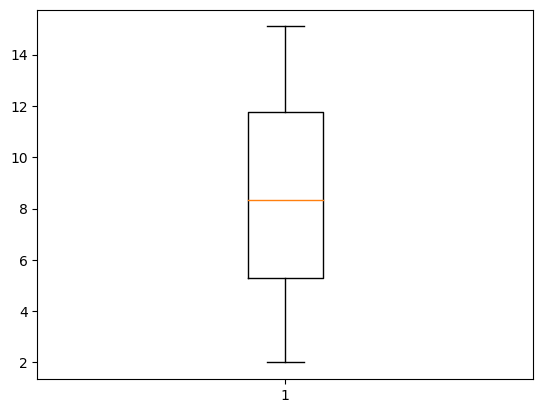

In [ ]:
plt.boxplot(data["stalk_height"])

### Histogram

(array([272., 233., 164., 226., 189., 184., 185., 186., 182., 179.]),
 array([ 1.        ,  3.40000538,  5.80001077,  8.20001615, 10.60002154,
        13.00002692, 15.40003231, 17.80003769, 20.20004307, 22.60004846,
        25.00005384]),
 <BarContainer object of 10 artists>)

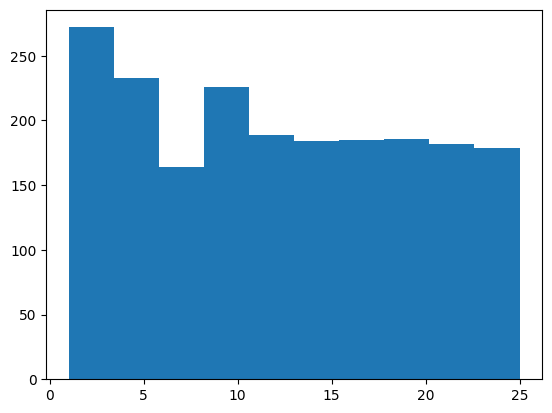

In [ ]:
plt.hist(data["cap_diameter"])

{'whiskers': [<matplotlib.lines.Line2D at 0x791b3f155d50>,
 'caps': [<matplotlib.lines.Line2D at 0x791b3f157340>,
 'boxes': [<matplotlib.lines.Line2D at 0x791b3f156f50>],
 'medians': [<matplotlib.lines.Line2D at 0x791b3f157880>],
 'fliers': [<matplotlib.lines.Line2D at 0x791b3f157b20>],
 'means': []}

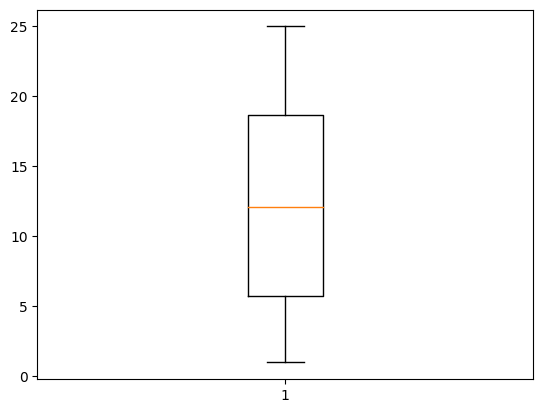

In [ ]:
plt.boxplot(data["cap_diameter"])

(array([217., 217., 214., 202., 188., 172., 201., 186., 202., 201.]),
 array([   0. ,  127.9,  255.8,  383.7,  511.6,  639.5,  767.4,  895.3,
        1023.2, 1151.1, 1279. ]),
 <BarContainer object of 10 artists>)

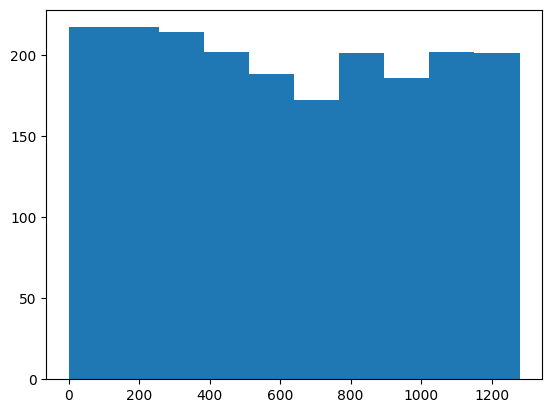

In [ ]:
plt.hist(data["Unnamed: 0"])

{'whiskers': [<matplotlib.lines.Line2D at 0x791b3f05f310>,
 'caps': [<matplotlib.lines.Line2D at 0x791b3f05f730>,
 'boxes': [<matplotlib.lines.Line2D at 0x791b3f05f070>],
 'medians': [<matplotlib.lines.Line2D at 0x791b3f05fc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x791b3f05ff10>],
 'means': []}

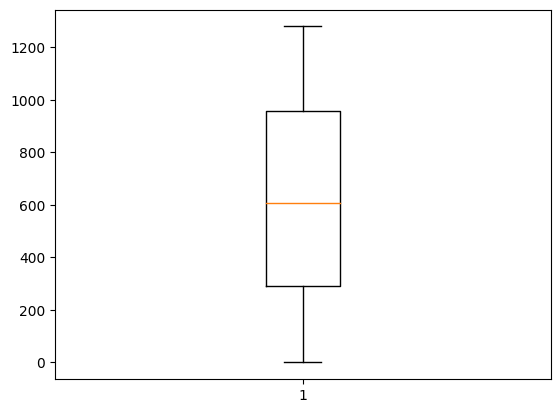

In [ ]:
plt.boxplot(data["Unnamed: 0"])

In [ ]:
data.head(2)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319


## Barplots

<Axes: xlabel='cap_shape'>

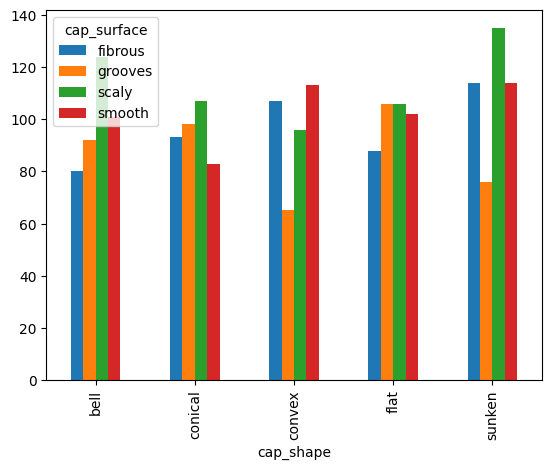

In [ ]:
pd.crosstab(data["cap_shape"],data["cap_surface"]).plot(kind="bar")

### Piechart

<Axes: ylabel='count'>

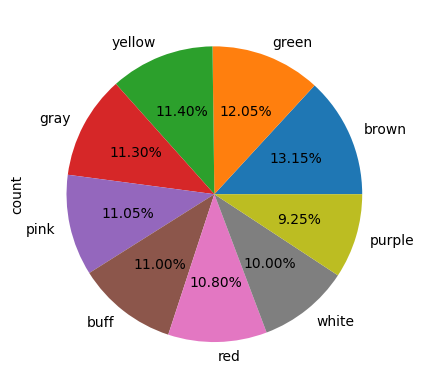

In [ ]:
data["cap_color"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<Axes: xlabel='odor'>

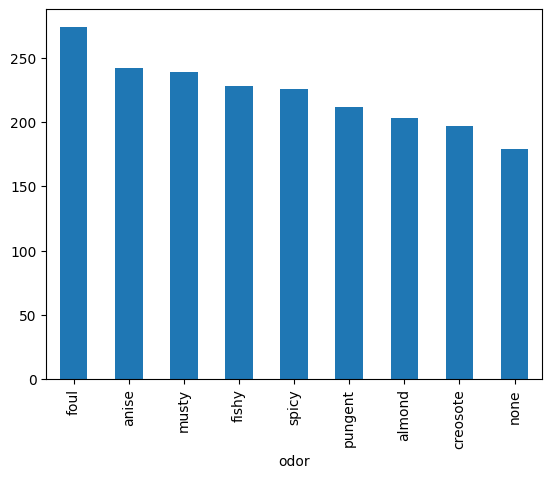

In [ ]:
data["odor"].value_counts().plot(kind="bar")

<Axes: xlabel='class'>

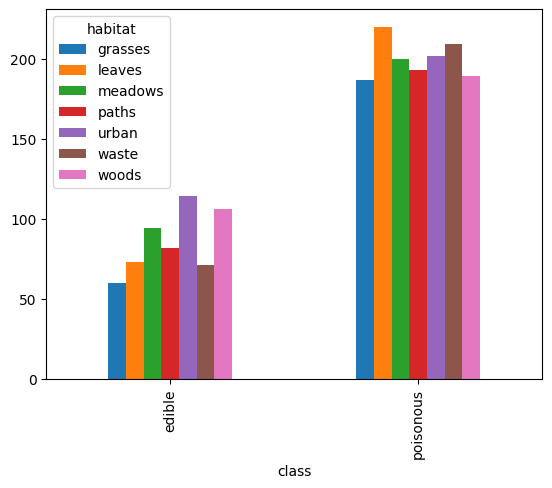

In [ ]:
pd.crosstab(data["class"],data["habitat"]).plot(kind="bar")

<Axes: ylabel='count'>

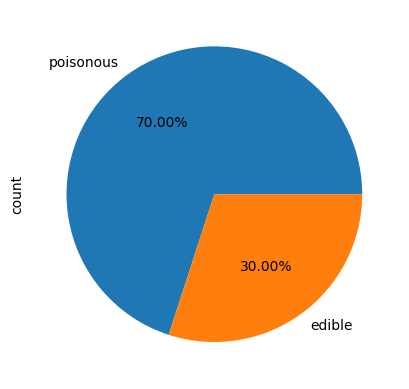

In [ ]:
data["class"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<Axes: ylabel='count'>

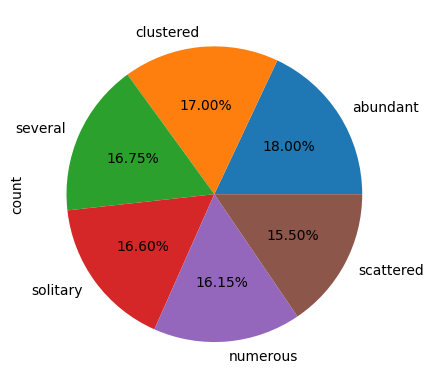

In [ ]:
data["population"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<Axes: xlabel='ring_type'>

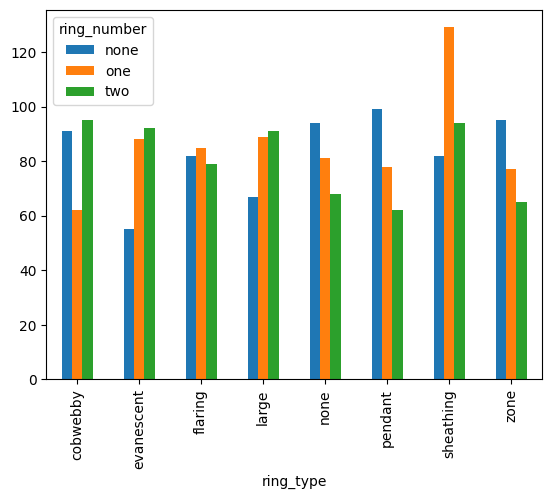

In [ ]:
pd.crosstab(data["ring_type"],data["ring_number"]).plot(kind="bar")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

### Checking for NUll values

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


### Identifing and dropping Duplicates

In [ ]:
data[data.duplicated(keep="first")].head(20)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,1279,bell,smooth,pink,no,foul,notched,distant,broad,pink,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,1275,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,549,conical,grooves,brown,no,foul,free,distant,broad,white,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,1198,sunken,smooth,white,no,anise,attached,crowded,broad,black,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
134,986,sunken,smooth,red,no,almond,notched,crowded,narrow,white,...,partial,orange,none,evanescent,chocolate,several,paths,poisonous,14.088450,18.496169
135,879,flat,grooves,green,no,foul,free,crowded,narrow,gray,...,universal,orange,two,zone,black,abundant,urban,poisonous,11.938913,16.818947
144,884,conical,smooth,gray,no,fishy,notched,close,narrow,pink,...,universal,yellow,one,flaring,chocolate,clustered,leaves,poisonous,13.088260,2.217697
157,275,sunken,grooves,yellow,yes,almond,notched,close,narrow,yellow,...,universal,orange,two,flaring,white,clustered,paths,poisonous,12.938930,13.380007
159,707,sunken,grooves,white,yes,musty,notched,crowded,broad,white,...,partial,brown,one,pendant,orange,numerous,meadows,poisonous,13.572091,9.949051


In [ ]:
data=data.drop_duplicates(keep="first")

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,877,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
972,926,bell,grooves,pink,yes,anise,descending,distant,broad,brown,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
973,289,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
974,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                976 non-null    int64  
 1   cap_shape                 976 non-null    object 
 2   cap_surface               976 non-null    object 
 3   cap_color                 976 non-null    object 
 4   bruises                   976 non-null    object 
 5   odor                      976 non-null    object 
 6   gill_attachment           976 non-null    object 
 7   gill_spacing              976 non-null    object 
 8   gill_size                 976 non-null    object 
 9   gill_color                976 non-null    object 
 10  stalk_shape               976 non-null    object 
 11  stalk_root                976 non-null    object 
 12  stalk_surface_above_ring  976 non-null    object 
 13  stalk_surface_below_ring  976 non-null    object 
 14  stalk_colo

In [ ]:
data.drop(["Unnamed: 0"],axis=1,inplace=True) #Removing Unnecessary columns

## Label Encoding

In [ ]:
Encoded=data.iloc[:,:-2]

In [ ]:
Encoded.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],
      dtype='object')

In [ ]:
Encoded[["cap_shape","cap_surface","cap_color","bruises","odor","gill_attachment","gill_spacing","gill_size","gill_color","stalk_shape","stalk_root","stalk_surface_above_ring","stalk_surface_below_ring","stalk_color_above_ring","stalk_color_below_ring","veil_type","veil_color","ring_number","ring_type","spore_print_color","population","habitat","class"]]=Encoded[["cap_shape","cap_surface","cap_color","bruises","odor","gill_attachment","gill_spacing","gill_size","gill_color","stalk_shape","stalk_root","stalk_surface_above_ring","stalk_surface_below_ring","stalk_color_above_ring","stalk_color_below_ring","veil_type","veil_color","ring_number","ring_type","spore_print_color","population","habitat","class"]].apply(LabelEncoder().fit_transform)

In [ ]:
Encoded

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,4,2,7,0,1,1,2,0,7,1,...,3,8,0,0,2,6,3,1,5,1
1,4,0,6,0,1,3,1,1,3,0,...,2,0,1,0,2,6,1,2,5,0
2,3,1,5,1,4,1,1,0,8,1,...,8,3,1,3,2,6,6,0,5,1
3,0,2,4,1,3,3,0,0,6,0,...,8,5,0,3,2,0,4,1,0,1
4,3,3,8,1,5,2,1,1,6,0,...,3,7,1,2,0,4,8,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1,1,0,0,4,3,1,0,3,1,...,6,8,1,0,0,3,1,2,3,0
972,0,1,4,1,1,1,2,0,1,0,...,5,5,0,0,2,5,8,2,0,1
973,4,3,5,1,1,1,1,1,2,1,...,0,6,1,1,2,4,5,0,0,0
974,4,2,5,1,5,0,2,1,9,1,...,5,4,0,2,1,7,8,2,5,1


In [ ]:
Encoded["stalk_height"]=data["stalk_height"]
Encoded["cap_diameter"]=data["cap_diameter"]

In [ ]:
temp=pd.DataFrame()

In [ ]:
temp["class"]=Encoded["class"]

In [ ]:
Encoded.drop(["class"],axis=1,inplace=True)

In [ ]:
temp

,class
0,1
1,0
2,1
3,1
4,1
...,...
971,0
972,1
973,0
974,1


In [ ]:
Encoded["class"]=temp["class"]

In [ ]:
Encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 976 non-null    int64  
 1   cap_surface               976 non-null    int64  
 2   cap_color                 976 non-null    int64  
 3   bruises                   976 non-null    int64  
 4   odor                      976 non-null    int64  
 5   gill_attachment           976 non-null    int64  
 6   gill_spacing              976 non-null    int64  
 7   gill_size                 976 non-null    int64  
 8   gill_color                976 non-null    int64  
 9   stalk_shape               976 non-null    int64  
 10  stalk_root                976 non-null    int64  
 11  stalk_surface_above_ring  976 non-null    int64  
 12  stalk_surface_below_ring  976 non-null    int64  
 13  stalk_color_above_ring    976 non-null    int64  
 14  stalk_colo

## Splitting Data into Training and Testing sets

In [ ]:
x=Encoded.iloc[:,:-1]
y=Encoded.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((683, 24), (293, 24), (683,), (293,))

<Axes: xlabel='cap_diameter', ylabel='stalk_height'>

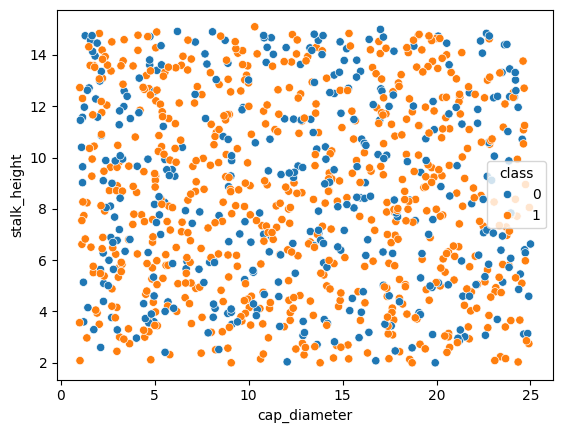

In [ ]:
sns.scatterplot(y="stalk_height",x="cap_diameter",data=Encoded,hue="class")


## Applying SVC Model with Default Parameters

In [ ]:
clf=SVC()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 59.38566552901023


array([[  0, 119],
       [  0, 174]])

## Experimenting with different SVM hyperparameters

In [ ]:
clf=SVC(kernel='poly',C=1,gamma=20)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 50.51194539249146


array([[ 43,  76],
       [ 69, 105]])

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf','linear','poly','sigmoid'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.650063938618926)

In [ ]:
clf=SVC(kernel='rbf',C=15,gamma=50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)
a=classification_report(y_test,y_pred)
print(a)

Accuracy = 59.38566552901023
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       119
           1       0.59      1.00      0.75       174

    accuracy                           0.59       293
   macro avg       0.30      0.50      0.37       293
weighted avg       0.35      0.59      0.44       293



In [ ]:
clf=SVC(kernel='linear',C=15,gamma=50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)
a=classification_report(y_test,y_pred)
print(a)

Accuracy = 59.38566552901023
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       119
           1       0.59      1.00      0.75       174

    accuracy                           0.59       293
   macro avg       0.30      0.50      0.37       293
weighted avg       0.35      0.59      0.44       293



## Comparision and Analysis

We got the best accuracy score with the parameters of "RBF" Kernel,'C': 15, 'gamma': 50 values.

**Key Comparison Insights:**

**Linear Kernel:**

Performs well when the data is linearly separable or nearly so. Simple and fast, but limited in modeling complex relationships.

**Polynomial Kernel:**

Can capture polynomial relationships, but can be prone to overfitting and may be computationally expensive.

**RBF Kernel:**

 Effective for non-linear problems, but needs careful tuning of the gamma parameter to avoid underfitting or overfitting.

**SVM Strengths and Weaknesses:**

**Strengths:**

Effective in High Dimensions

Non-linear Boundaries

Robust to Outliers

**Weaknesses:**

Computationally Expensive

Sensitive to Hyperparameters

Scaling of Features



**Practical Implications of SVM in Real-World Classification Tasks**

**When to Use SVM:**

High-dimensional Data

Non-linearly Separable Data

Small to Medium-sized Datasets

**When Not to Use SVM:**

Large Datasets

Imbalanced Data

Interpretability